# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


**Общая информация**

**Срок сдачи:** 25 апреля 18:00 Сдача **очная** на онлайн занятии.


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0422, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Интуитивно*** к решению приходим следующим образом. Градиент функции показывает направление наискорейшего возрастания функции => антиградиент функции показывает направление наискорейшего убывания функции, то есть мы движемся в сторону минимума функции.

$$w_{new} = w_{old} - a\nabla_{w}Q(w_{old}) $$
$$Q(w_{old}) = \frac{1}{N}\sum_{i=1}^{N}{L(w_{old}, x_{i}, y_{i})} = \frac{1}{N}\sum_{i=1}^{N}{(x_{i}*w_{old} - y_{i})^2} $$

$$w_{new} = w_{old} - a\frac{2}{N}\sum_{i=1}^{n}{(x_{i} \cdot w_{old} - y_{i})x_{i}}$$
Добавим L2 регуляризацию:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

$$w_{new} = w_{old} - 2a\left[\frac{1}{N}\sum_{i=1}^{n}{(x_{i} \cdot w_{old} - y_{i})x_{i}} + \frac{1}{C}w_{old}\right]$$


Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ...$$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***
$$ w_{new} = w_{old} - a\nabla_{w}Q(w_{old}) $$
$$Q(w_{old}) = \frac{1}{N}\sum_{i=1}^{N}{L(w_{old}, x_{i}, y_{i})} = \frac{1}{N}\sum_{i=1}^{N} y_i \log (\sigma(w,x)) + ( 1 - y_i) \log (1 -\sigma(w,x)) $$
$$ w_{new} = w_{old} - a\frac{1}{N}\cdot \sum_{i=1}^{n}\left(\sigma(w_{old},x_i) - y_i \right) x_i $$
Добавим L2 регуляризацию:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

$$ w_{new} = w_{old} - a \left[\frac{1}{N}\cdot \sum_{i=1}^{n}\left(\sigma(w_{old},x_i) - y_i \right) x_i  + \frac{2}{C} w_{old}\right] $$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***$$ $$
Необходимое условие минимума: градиент равен нулю

$$ \nabla_w Q(w) = 2X^TXw - 2X^Ty = 0 $$

Достаточное условие минимума: гессиан должен быть положительно определен:
$$ \frac{\partial{Q(w)}}{\partial{x_i}} = \nabla_w Q(w)_i = 2X^TX_i w-2X^T_iy = 0 $$
$$ H(Q(w)) = H\left(\frac{\partial^2Q}{\partial w_i \partial w_j}\right) = 2X^TX $$
Матрица A положительно определена, если существует невырожденная матрица B, такая что: $A = B^TB$
В нашем случае $A = 2X^TX$, матрица X невырожденная, следовательно гессиан положительно определен => $w = (X^TX)^{-1}X^TY $ - точка минимума.

***Точное решение для модели с $L2$ регуляризацией:***
$$ \nabla_w Q'(w) = 2X^TXw - 2X^Ty + \nabla_w\sum_{i=1}^{D} w_i^2 = 2X^TXw - 2X^Ty + 2w = 0 $$
$$ w = (X^TX+\frac{1}{C}Iw)^{-1}X^Ty $$
$L2$ регуляризация устраняет линейную зависимость признаков.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))  = p(y_i = 1 |x_i) \log \left(\frac{1 - a(x_i)}{a(x_i)}\right) - \log(1 - a(x_i))$$
$$ \frac{\partial}{\partial{a(x_i)}}\left[p(y_i = 1 |x_i) \log \left(\frac{1 - a(x_i)}{a(x_i)}\right) - \log(1 - a(x_i))\right] = 
\frac{a(x_i)-p(y_i = 1 |x_i)}{(1-a(x_i))a(x_i)} = 0
 $$
 Соответственно минимум достигается при $$ a(x_i) = p(y_i = 1 |x_i) $$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***: $$$$
$w_0$ вводится для линейности модели. Признак $f_0$, соответствующий $w_0$, тождественно равнен единице. Он не зависит от других параметров. Регурялизация нужна для того, чтобы избежать больших весов, то есть избежать переобучение, а так как признак $f_0$ не изменяется, то свободный член не нужен.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break


Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print("Fib num: " + str(j) + " fib values: " + str(fib_val))


Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print("Fib num: " + str(j) + " fib values: " + str(fib_val))


Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print("Fib num: " + str(j) + " fib values: " + str(fib_val))


Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    dataset = np.concatenate((X, y[:, np.newaxis]), axis=1)
    if shuffle:
        np.random.shuffle(dataset)
    for i in np.vsplit(dataset[:(dataset.shape[0] // batch_size * batch_size)],
                       dataset.shape[0] // batch_size):
        yield (i[:, :-1], i[:, -1].flatten())


In [7]:
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1/(1 + np.exp(-x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):
    def __init__(
            self,
            batch_generator,
            C=1,
            alpha=0.01,
            max_epoch=10,
            batch_size=1,
            border=0.5,
            model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.batch_generator = batch_generator
        self.border = border
        self.errors = {'iter': [], 'loss': []}
        self.model_type = model_type

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        a = np.dot(X_batch, self.weights)
        if self.model_type == 'lin_reg':
            diff = (y_batch - a)
            loss = 1 / X_batch.shape[0] * np.dot(diff, diff)
            + 1 / self.C * np.dot(self.weights, self.weights)
            return loss
        elif self.model_type == 'log_reg':
            a = sigmoid(a)
            diff = y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)
            loss = -1 / X_batch.shape[0] * np.sum(diff)
            + 1 / self.C * np.dot(self.weights, self.weights)
            return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        r = 2 / self.C * self.weights
        r[0] = 0
        if self.model_type == 'lin_reg':
            diff = (np.dot(X_batch, self.weights) - y_batch)[:, None] * X_batch
            loss_grad = 2 / X_batch.shape[0] * np.sum(diff, axis=0) + r
            return loss_grad
        elif self.model_type == 'log_reg':
            diff = (sigmoid(np.dot(X_batch,
                    self.weights)) - y_batch)[:, None] * X_batch
            loss_grad = 1 / X_batch.shape[0] * np.sum(diff, axis=0) + r
            return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """

        self.weights = self.weights - self.alpha * new_grad

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''

        self.weights = np.random.rand(X.shape[1] + 1)
        for n in range(0, self.max_epoch):
            new_X = np.hstack((np.ones((X.shape[0], 1)), X))
            epoch_generator = self.batch_generator(new_X,
                                                   y,
                                                   batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_loss_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors['iter'].append(batch_num)
                self.errors['loss'].append(batch_loss)
                self.update_weights(batch_loss_grad)
        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if self.model_type == 'lin_reg':
            y_pred = np.dot(X, self.weights[1::])
            y_pred = (y_pred > 0).astype(int)
            return y_pred
        elif self.model_type == 'log_reg':
            new_X = np.hstack((np.ones((X.shape[0], 1)), X))
            y_pred = np.dot(new_X, self.weights)
            y_pred = (sigmoid(y_pred) > self.border).astype(int)
            return y_pred


Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [8]:
def plot_decision_boundary(clf):
    x = np.linspace(-4, 8, 100)
    y = -clf.weights[1] / clf.weights[2] * x - clf.weights[0] / clf.weights[2]
    plt.plot(x, y)


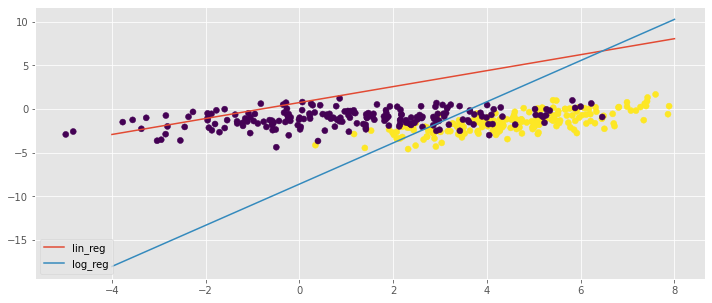

In [9]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

my_model_lin = MySGDClassifier(batch_generator,
                               max_epoch=10,
                               model_type='lin_reg',
                               batch_size=1,
                               border=0.5,
                               alpha=0.01,
                               C=1)
my_model_lin.fit(X, y)
plot_decision_boundary(my_model_lin)
my_model_log = MySGDClassifier(batch_generator,
                               max_epoch=10,
                               model_type='log_reg',
                               batch_size=1,
                               border=0.5,
                               alpha=0.01,
                               C=1)
my_model_log.fit(X, y)
plot_decision_boundary(my_model_log)
plt.legend(['lin_reg', 'log_reg'], loc='lower left')

plt.scatter(X[:, 0], X[:, 1], c=y)


Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [10]:
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples=100000, n_features=10,
                           n_informative=4, n_redundant=0,
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)


Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

<Figure size 1280x400 with 0 Axes>

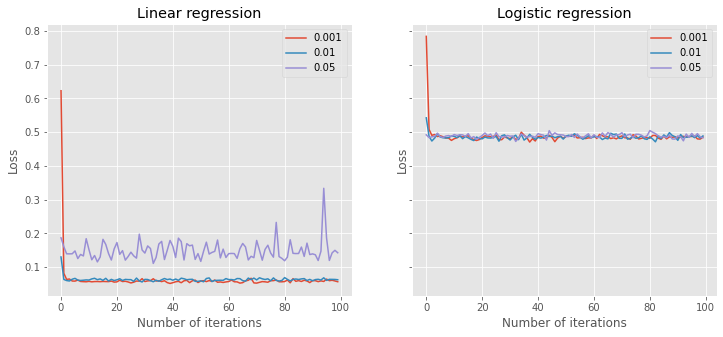

In [12]:
colors = ['r', 'g', 'b']
plt.figure(num=None, figsize=(16, 5), dpi=80, facecolor='w',
           edgecolor='k')
(_, axes) = plt.subplots(1, 2, sharey=True)
N = 1000
for a in [0.001, 0.01, 0.05]:
    myclf_lin = MySGDClassifier(
        batch_generator,
        max_epoch=1,
        model_type='lin_reg',
        batch_size=1,
        border=0.5,
        alpha=a,
        C=1,
        )
    myclf_lin.fit(X, y)
    loss_lin = np.reshape(myclf_lin.errors['loss'], (-1, N))
    loss_lin_mean = np.mean(loss_lin, axis=1).flatten()

    myclf_log = MySGDClassifier(
        batch_generator,
        max_epoch=1,
        model_type='log_reg',
        batch_size=1,
        border=0.5,
        alpha=a,
        C=1,
        )
    myclf_log.fit(X, y)
    loss_log = np.reshape(myclf_log.errors['loss'], (-1, N))
    loss_log_mean = np.mean(loss_log, axis=1).flatten()

    axes[0].plot(range(X.shape[0] // N), loss_lin_mean)
    axes[1].plot(range(X.shape[0] // N), loss_log_mean)

axes[0].set_title('Linear regression')
axes[1].set_title('Logistic regression')

axes[0].set_xlabel('Number of iterations')
axes[0].set_ylabel('Loss')

axes[1].set_xlabel('Number of iterations')
axes[1].set_ylabel('Loss')

axes[0].legend(['0.001', '0.01', '0.05'], loc='upper right')
axes[1].legend(['0.001', '0.01', '0.05'], loc='upper right')


Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

<Figure size 1280x800 with 0 Axes>

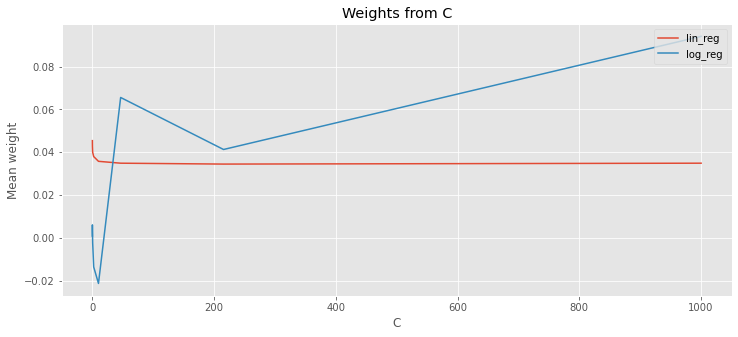

In [13]:
colors = ['r', 'g', 'b']
plt.figure(num=None, figsize=(16, 10), dpi=80, facecolor='w',
           edgecolor='k')
(_, axes) = plt.subplots(1, 1, sharey=True)
w_lin = []
w_log = []
for i in np.logspace(3, -3, 10):
    myclf_lin = MySGDClassifier(
        batch_generator,
        max_epoch=10,
        model_type='lin_reg',
        batch_size=1,
        border=0.5,
        alpha=0.00001,
        C=i,
        )
    myclf_lin.fit(X.astype('float64'), y.astype('float64'))
    w_lin.append(np.mean(myclf_lin.weights))

    myclf_log = MySGDClassifier(
        batch_generator,
        max_epoch=10,
        model_type='log_reg',
        batch_size=1,
        border=0.5,
        alpha=0.00001,
        C=i,
        )
    myclf_log.fit(X.astype('float64'), y.astype('float64'))
    w_log.append(np.mean(myclf_log.weights))

axes.set_title('Weights from C')

axes.plot(np.logspace(3, -3, 10), w_lin)
axes.plot(np.logspace(3, -3, 10), w_log)

axes.set_xlabel('C')
axes.set_ylabel('Mean weight')

axes.legend(['lin_reg', 'log_reg'], loc='upper right')


Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [15]:
import codecs
doc_to_title = {}
with codecs.open('docs_titles.tsv', 'r', 'utf_8_sig') as f:
    for (num_line, line) in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print(len(doc_to_title))


28026


In [16]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))


In [17]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for (k, (doc_id, title, target_id)) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            (doc_id_j, title_j, target_j) = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)


(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [18]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')


In [19]:


def get_validation_score(
        X,
        y,
        model_type,
        alpha=0.001,
        C=1,
        max_epoch=1,
        batch_size=1,
        border=0.5,
        n_splits=3):
    skf = StratifiedKFold(n_splits=n_splits)
    skf.get_n_splits(X, y)
    cur = []
    scaler = StandardScaler()

    myclf = MySGDClassifier(
        batch_generator,
        max_epoch=max_epoch,
        model_type=model_type,
        batch_size=batch_size,
        border=border,
        alpha=alpha,
        C=C,
        )
    for (i, j) in skf.split(X, y):
        myclf.fit(scaler.fit_transform(X[i]), y[i])
        cur.append(f1_score(myclf.predict(scaler.fit_transform(X[j])),
                   y[j]))
    res = np.mean(cur)
    return res


<Figure size 1280x800 with 0 Axes>

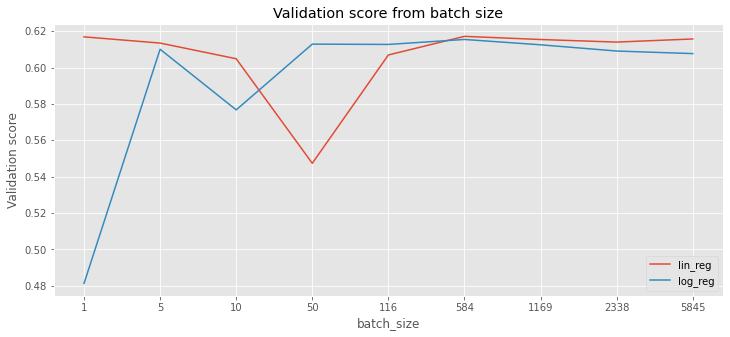

In [20]:
# batch size

colors = ['r', 'g', 'b']
plt.figure(num=None, figsize=(16, 10), dpi=80, facecolor='w',
           edgecolor='k')
(_, axes) = plt.subplots(1, 1)
lin_scores = []
log_scores = []
N = X_train.shape[0]
batch_size_range = [
    1,
    5,
    10,
    50,
    N // 100,
    N // 20,
    N // 10,
    N // 5,
    N // 2,
    ]
for batch in batch_size_range:
    score = get_validation_score(X_train, y_train, model_type='lin_reg',
                                 batch_size=batch)
    lin_scores.append(score)

    score = get_validation_score(X_train, y_train, model_type='log_reg',
                                 batch_size=batch)
    log_scores.append(score)

axes.set_title('Validation score from batch size')

axes.plot(list(map(str, batch_size_range)), lin_scores)
axes.plot(list(map(str, batch_size_range)), log_scores)

axes.set_xlabel('batch_size')
axes.set_ylabel('Validation score')

axes.legend(['lin_reg', 'log_reg'], loc='lower right')


Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

<Figure size 1280x800 with 0 Axes>

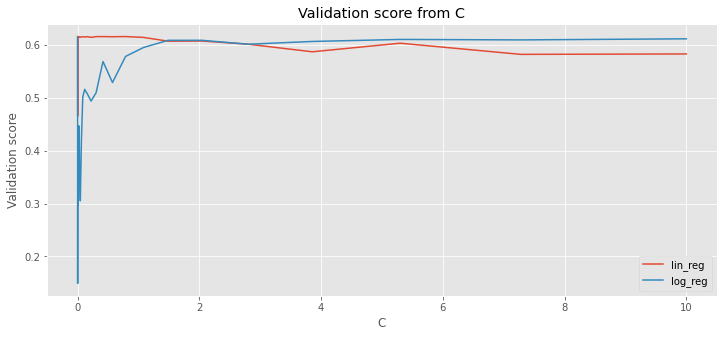

In [21]:
# C

colors = ['r', 'g', 'b']
plt.figure(num=None, figsize=(16, 10), dpi=80, facecolor='w',
           edgecolor='k')
(_, axes) = plt.subplots(1, 1)
lin_scores = []
log_scores = []
N = X_train.shape[0]
for C in np.logspace(1, -3, 30):
    score = get_validation_score(X_train, y_train, model_type='lin_reg',
                                 batch_size=5, C=C)
    lin_scores.append(score)

    score = get_validation_score(X_train, y_train, model_type='log_reg',
                                 batch_size=5, C=C)
    log_scores.append(score)

axes.set_title('Validation score from C')

axes.plot(np.logspace(1, -3, 30), lin_scores)
axes.plot(np.logspace(1, -3, 30), log_scores)

axes.set_xlabel('C')
axes.set_ylabel('Validation score')

axes.legend(['lin_reg', 'log_reg'], loc='lower right')


<Figure size 1280x800 with 0 Axes>

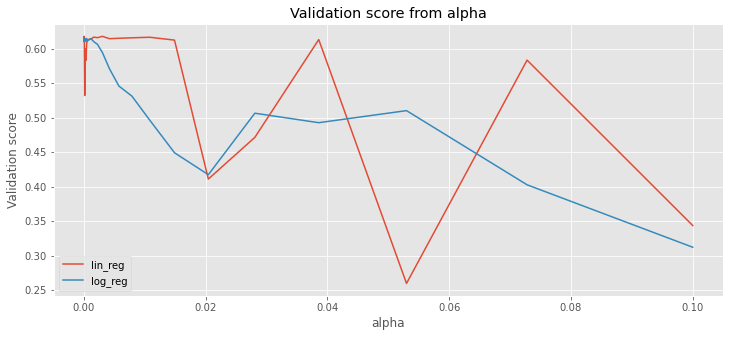

In [22]:
# alpha

colors = ['r', 'g', 'b']
plt.figure(num=None, figsize=(16, 10), dpi=80, facecolor='w',
           edgecolor='k')
(_, axes) = plt.subplots(1, 1)
lin_scores = []
log_scores = []
N = X_train.shape[0]
for a in np.logspace(-1, -5, 30):
    score = get_validation_score(
        X_train,
        y_train,
        model_type='lin_reg',
        batch_size=5,
        C=1,
        alpha=a,
        )
    lin_scores.append(score)

    score = get_validation_score(
        X_train,
        y_train,
        model_type='log_reg',
        batch_size=5,
        C=5,
        alpha=a,
        )
    log_scores.append(score)

axes.set_title('Validation score from alpha')

axes.plot(np.logspace(-1, -5, 30), lin_scores)
axes.plot(np.logspace(-1, -5, 30), log_scores)

axes.set_xlabel('alpha')
axes.set_ylabel('Validation score')

axes.legend(['lin_reg', 'log_reg'], loc='lower left')


<Figure size 1280x800 with 0 Axes>

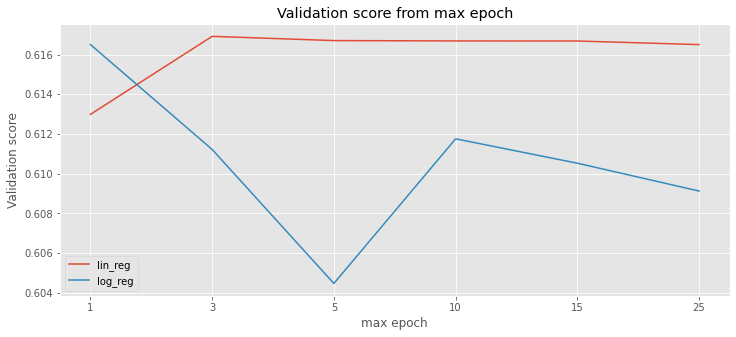

In [23]:
# max_epoch

colors = ['r', 'g', 'b']
plt.figure(num=None, figsize=(16, 10), dpi=80, facecolor='w',
           edgecolor='k')
(_, axes) = plt.subplots(1, 1)
lin_scores = []
log_scores = []
N = X_train.shape[0]
epoch_range = [
    1,
    3,
    5,
    10,
    15,
    25,
    ]
for epoch in epoch_range:
    score = get_validation_score(
        X_train,
        y_train,
        model_type='lin_reg',
        batch_size=5,
        C=1,
        alpha=0.001,
        max_epoch=epoch,
        )
    lin_scores.append(score)

    score = get_validation_score(
        X_train,
        y_train,
        model_type='log_reg',
        batch_size=5,
        C=5,
        alpha=0.0001,
        max_epoch=epoch,
        )
    log_scores.append(score)

axes.set_title('Validation score from max epoch')

axes.plot(list(map(str, epoch_range)), lin_scores)
axes.plot(list(map(str, epoch_range)), log_scores)

axes.set_xlabel('max epoch')
axes.set_ylabel('Validation score')

axes.legend(['lin_reg', 'log_reg'], loc='lower left')


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

Text(0, 0.5, 'Validation score')

<Figure size 1280x800 with 0 Axes>

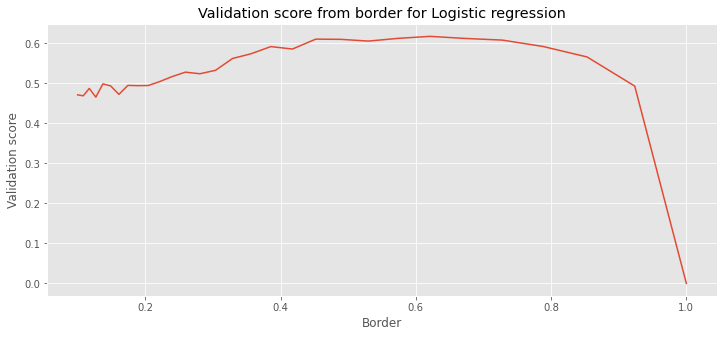

In [24]:
# border

colors = ['r', 'g', 'b']
plt.figure(num=None, figsize=(16, 10), dpi=80, facecolor='w',
           edgecolor='k')
(_, axes) = plt.subplots(1, 1)
log_scores = []
for border in np.logspace(0, -1, 30):
    score = get_validation_score(
        X_train,
        y_train,
        model_type='log_reg',
        batch_size=5,
        C=5,
        alpha=0.0001,
        max_epoch=10,
        border=border,
        )
    log_scores.append(score)

axes.set_title('Validation score from border for Logistic regression')

axes.plot(np.logspace(0, -1, 30), log_scores)

axes.set_xlabel('Border')
axes.set_ylabel('Validation score')


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

In [25]:
get_validation_score(
    X_train,
    y_train,
    model_type='lin_reg',
    batch_size=5,
    C=1,
    alpha=0.001,
    max_epoch=10,
    )


0.6163699450904895

In [26]:
get_validation_score(
    X_train,
    y_train,
    model_type='log_reg',
    batch_size=5,
    C=5,
    alpha=0.0001,
    max_epoch=10,
    border=0.6
    )

0.6063883108639533

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [27]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for (k, (doc_id, title)) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            (doc_id_j, title_j) = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
myclf = MySGDClassifier(
    batch_generator,
    max_epoch=10,
    model_type='lin_reg',
    batch_size=5,
    alpha=0.001,
    C=1,
    )
myclf.fit(X_train, y_train)
y_test_pred = myclf.predict(X_test_scaled)

ans_data = {'pair_id': [], 'target': []}
ans_data['pair_id'] = test_data['pair_id']
ans_data['target'] = np.array(y_test_pred, dtype=int)
df = pd.DataFrame(ans_data, columns=['pair_id', 'target'])
df.to_csv('my_prediction.csv', index=None)


# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе. 
* Понравилось решать эту домашнюю работу $:)$

*** ВАШ ОТЗЫВ ЗДЕСЬ***